Normal Vector: [0.07484994 0.91761162 0.390367  ]
Centroid of the Plane: [-1.90823667  0.67304167  0.331995  ]
Angle θ between normal and vector to point: 86.14 degrees


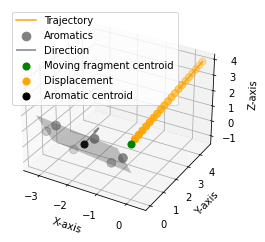

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to calculate the normal vector using the cross product of vectors formed by 3 points
def get_norm_arom_plane(arom_C_coords, moving_frag_centroid, tolerance=1e-1):
    if len(arom_C_coords) < 3:
        raise ValueError("At least 3 points are required to define a plane.")
    
    # Calculate the centroid
    C6_centroid = calculate_centroid(arom_C_coords)
    
    # Select any 3 non-collinear points from the ring
    vec1 = arom_C_coords[1] - arom_C_coords[0]
    vec2 = arom_C_coords[2] - arom_C_coords[4]
    
    # Compute the normal using the cross product
    normal_dir = np.cross(vec1, vec2)
    
    # Normalize the normal vector
    normal_dir /= np.linalg.norm(normal_dir)
    
    # Vector from ring centroid to moving fragment centroid
    vector_to_moving_frag = moving_frag_centroid - C6_centroid
    
    # Check the direction of the normal vector
    # If the dot product is negative, reverse the normal vector
    if np.dot(normal_dir, vector_to_moving_frag) < 0:
        normal_dir = -normal_dir
    
    return normal_dir, C6_centroid

# Function to calculate the centroid (middle point) of the plane formed by points
def calculate_centroid(arom_C_coords):
    return np.mean(arom_C_coords, axis=0)

# Function to displace a point along a normal direction
def displace_centroid_along_normal(centroid_to_move, normal_dir, distance_step, k):
    displaced_centroids = []
    for i in range(k):
        displaced_centroid = centroid_to_move + normal_dir * distance_step * (i + 1)
        displaced_centroids.append(displaced_centroid)
    return np.array(displaced_centroids)

# Function to calculate the angle theta between the normal and the vector to the point
def calculate_angle_between_vectors(normal_dir, vector_to_point):
    dot_product = np.dot(normal_dir, vector_to_point)
    norm_normal = np.linalg.norm(normal_dir)
    norm_vector_to_point = np.linalg.norm(vector_to_point)
    
    # Calculate cosine of theta
    cos_theta = dot_product / (norm_normal * norm_vector_to_point)
    
    # Calculate angle in radians, then convert to degrees
    theta = np.arccos(cos_theta)  # in radians
    theta_degrees = np.degrees(theta)  # in degrees
    
    return theta_degrees

# Plot the molecule, plane, and normal vectors
def plot_molecule_and_plane(arom_C_coord, normal_dir, C6_centroid, centroid_to_move, displaced_centroids):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    points = np.array(arom_C_coord)
    
    # Plot the points representing the atoms
    ax.scatter(arom_C_coord[:, 0], arom_C_coord[:, 1], arom_C_coord[:, 2], color='grey', s=75, label='Aromatics')
    
    # Plot the plane (a rough approximation using centroid and normal)
    point  = C6_centroid
    d = -point.dot(normal_dir)  # Plane equation: ax + by + cz + d = 0
    
    # Create a grid of points to plot the plane
    xx, yy = np.meshgrid(np.linspace(min(arom_C_coord[:, 0]), max(arom_C_coord[:, 0]), 10),
                         np.linspace(min(arom_C_coord[:, 1]), max(arom_C_coord[:, 1]), 10))
    zz = (-normal_dir[0] * xx - normal_dir[1] * yy - d) * 1. / normal_dir[2]
    
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.3, rstride=100, cstride=100)

    # Plot the normal vector for the plane
    ax.quiver(C6_centroid[0], C6_centroid[1], C6_centroid[2], 
              normal_dir[0], normal_dir[1], normal_dir[2], length=1.0, color='grey', label='Direction')
    
    # Plot the centroid above the plane
    ax.scatter(centroid_to_move[0], centroid_to_move[1], centroid_to_move[2], color='green', s=50, label='Moving fragment centroid')

    # Plot the displaced points along the normal direction
    displaced_centroids = np.array(displaced_centroids)
    ax.scatter(displaced_centroids[:, 0], displaced_centroids[:, 1], displaced_centroids[:, 2], color='orange', s=50, label='Displacement')
    
    # Plot the trajectory of the displaced points
    ax.plot(displaced_centroids[:, 0], displaced_centroids[:, 1], displaced_centroids[:, 2], color='orange', label='Trajectory')
    
    # Plot centroid of the points
    ax.scatter(C6_centroid[0], C6_centroid[1], C6_centroid[2], color='k', s=50, label='Aromatic centroid')
    
    # Set plot labels
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    # Add legend and show plot
    ax.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Input: 5 or 6 points in 3D space (x, y, z), all lying on the same plane (z = 0)
    C6_ring = np.array([
        [-0.51724, 0.54821, 0.35582],  # Carbon atom positions on a hexagonal plane
        [-1.15680, 1.08010, -0.76605],
        [-2.54090, 1.20110, -0.78853],
        [-3.29528, 0.79560, 0.30810],
        [-2.66210, 0.26887, 1.42834],
        [-1.27710, 0.14437, 1.45429]
    ])

    # Point above the plane
    moving_frag_centroid = np.array([1.0, 1.0, 6.0])
    
    try:
        # Calculate the normal vectors and centroid of the plane
        normal_dir, C6_centroid = get_norm_arom_plane(C6_ring, moving_frag_centroid)
        
        # Output the normal vector direction
        print(f"Normal Vector: {normal_dir}")
        print(f"Centroid of the Plane: {C6_centroid}")
        
        # Compute the vector from the C6 centroid to the point above the plane (Fragment 2 centroid - moving_frag)
        r_C6_to_moving_frag = moving_frag_centroid - C6_centroid
        
        # Calculate the angle between the normal and the vector to the point
        theta = calculate_angle_between_vectors(normal_dir, r_C6_to_moving_frag)
        print(f"Angle θ between normal and vector to point: {theta:.2f} degrees")
        
        # Displace the point above the plane along the normal direction
        distance_step = 0.25  # Displacement step size
        k = 20      # Number of times to displace the point
        displaced_centroids = displace_centroid_along_normal(moving_frag_centroid, normal_dir, distance_step, k)
        
        # Plot the molecule, plane, normal vectors, and displaced points
        plot_molecule_and_plane(C6_ring, normal_dir, C6_centroid, moving_frag_centroid, displaced_centroids)
        
    except ValueError as e:
        print(e)
